In [15]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
def input_pad(x,h):
    half = (len(h)-1) // 2
    return np.concatenate((x[-half:], x, x[:half]))

def F(x):
    return np.fft.fft(x)

def Ⅎ(x):
    return np.fft.ifft(x)
    
def ℋ(z,h=h): # h should be padded to the size of x_pad, not the fft of x_pad!!!
    h_pad = np.pad(h, (0,len(z)-len(h)))
    return F(h_pad) * z

def ℋ_star(z,h=h):
    h_pad = np.pad(h, (0,len(z)-len(h)))
    return np.conjugate(F(h_pad)) * z

def B2_func(x, h=h):
    n = len(x)
    m = len(h)
    half = (m-1) // 2
    x_pad = np.concatenate((x[-half:], x, x[:half]))
    h_pad = np.pad(h, (0,n-1))
    assert len(x_pad) == len(h_pad)
    return scipy.fft.irfft(scipy.fft.rfft(x_pad) * scipy.fft.rfft(h_pad))[m-1:]

def B_func(x, h=h):
    m = len(h)
    x_pad = input_pad(x, h)
    return Ⅎ(ℋ(F(x_pad)))[m-1:]

def B2_func_star(x, h=h):
    n = len(x)
    m = len(h)
    half = (m-1) // 2
    x_pad = np.concatenate((x[-half:], x, x[:half]))
    h_pad = np.pad(h, (0,n-1))
    step1 = scipy.fft.rfft(x_pad)
    h_hat = scipy.fft.rfft(h_pad)
    h_hat_bar = np.conjugate(h_hat)
    step2 = h_hat_bar * step1
    return scipy.fft.irfft(step2)[:-(m-1)] # lol why??

def B2_func_star(x, h=h):
    n = len(x)
    m = len(h)
    half = (m-1) // 2
    x_pad = np.concatenate((x[-half:], x, x[:half]))
    h_pad = np.pad(h, (0,n-1))
    step1 = scipy.fft.rfft(x_pad)
    h_hat = scipy.fft.rfft(h_pad)
    h_hat_bar = np.conjugate(h_hat)
    step2 = h_hat_bar * step1
    return scipy.fft.irfft(step2)[:-(m-1)]

def B_func_star(x, h=h):
    m = len(h)
    x_pad = input_pad(x, h)
    return Ⅎ(ℋ_star(F(x_pad)))[:-(m-1)]

def test_adjoint(f, f_adj, x=np.random.rand(100), y=np.random.rand(100), tol=1e-8):
    return abs(np.vdot(f(x), y) - np.vdot(x, f_adj(y))) < tol

def test_adjoint_mat(A, A_adj, x=np.random.rand(100), y=np.random.rand(100), tol=1e-8):
    return abs(np.vdot(A_adj @ x, y) - np.vdot(x, A_adj @ y)) < tol

In [367]:
N = 100
x = np.sin(np.linspace(0,10,N)) + np.random.rand(N)*0.5
h = np.array([np.exp(-np.square(x)/2) for x in range(-2,3)])

In [150]:
target = scipy.ndimage.convolve(x,h, mode='wrap')
target

array([ 0.26761697,  0.68553183,  1.03331085,  1.13352349,  1.24951996,
        1.63449233,  2.22797931,  2.56104949,  2.63983742,  2.79433599,
        2.88236973,  2.82873209,  2.94256724,  3.11997231,  3.14391552,
        3.19731076,  3.38279747,  3.51098297,  3.47572404,  3.30244295,
        3.02652179,  2.63893727,  2.46946863,  2.56207606,  2.54555558,
        2.33799719,  2.13802442,  1.8897534 ,  1.61201765,  1.25222802,
        0.87506737,  0.61512358,  0.48984849,  0.32135073,  0.1405302 ,
       -0.08126582, -0.36545149, -0.65796929, -0.85126947, -1.00736875,
       -1.20460711, -1.36212434, -1.49753385, -1.51030689, -1.55537884,
       -1.68027759, -1.63911644, -1.66630355, -1.88707886, -1.96251403,
       -1.77229804, -1.41750296, -1.2425408 , -1.23427524, -1.20667475,
       -1.04333377, -0.73727605, -0.45940106, -0.30238421, -0.04051467,
        0.32614587,  0.60354132,  0.67008767,  0.8431383 ,  1.32465755,
        1.73593539,  1.81395498,  1.69734739,  1.70709772,  1.89

In [364]:
def my_circ_conv(x,h):
    n = len(x)
    m = len(h)
    x_pad = np.pad(x, (0, m-1))
#     x_pad = x
    h_pad = np.pad(h, (0,n-1))
    assert len(x_pad) == len(h_pad)
    return scipy.fft.irfft(scipy.fft.rfft(x_pad) * scipy.fft.rfft(h_pad))

def my_circ_conv2(x,h):
    n = len(x)
    m = len(h)
    x_pad = np.concatenate((x, x[:m-1]))
    h_pad = np.pad(h, (0,n-1))
    assert len(x_pad) == len(h_pad)
    return scipy.fft.irfft(scipy.fft.rfft(x_pad) * scipy.fft.rfft(h_pad))

def my_circ_conv3(x,h): # correct
    n = len(x)
    m = len(h)
    half = (m-1) // 2
    x_pad = np.concatenate((x[-half:], x, x[:half]))
    h_pad = np.pad(h, (0,n-1))
    assert len(x_pad) == len(h_pad)
    return scipy.fft.irfft(scipy.fft.rfft(x_pad) * scipy.fft.rfft(h_pad))[m-1:]

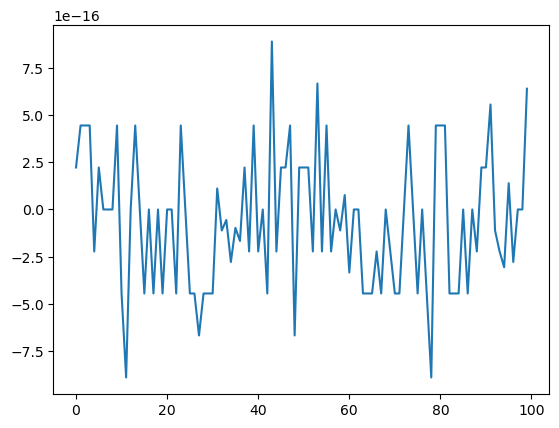

In [366]:
pred = my_circ_conv3(x,h)
plt.plot(pred - target)

In [333]:
target

array([ 0.26761697,  0.68553183,  1.03331085,  1.13352349,  1.24951996,
        1.63449233,  2.22797931,  2.56104949,  2.63983742,  2.79433599,
        2.88236973,  2.82873209,  2.94256724,  3.11997231,  3.14391552,
        3.19731076,  3.38279747,  3.51098297,  3.47572404,  3.30244295,
        3.02652179,  2.63893727,  2.46946863,  2.56207606,  2.54555558,
        2.33799719,  2.13802442,  1.8897534 ,  1.61201765,  1.25222802,
        0.87506737,  0.61512358,  0.48984849,  0.32135073,  0.1405302 ,
       -0.08126582, -0.36545149, -0.65796929, -0.85126947, -1.00736875,
       -1.20460711, -1.36212434, -1.49753385, -1.51030689, -1.55537884,
       -1.68027759, -1.63911644, -1.66630355, -1.88707886, -1.96251403,
       -1.77229804, -1.41750296, -1.2425408 , -1.23427524, -1.20667475,
       -1.04333377, -0.73727605, -0.45940106, -0.30238421, -0.04051467,
        0.32614587,  0.60354132,  0.67008767,  0.8431383 ,  1.32465755,
        1.73593539,  1.81395498,  1.69734739,  1.70709772,  1.89

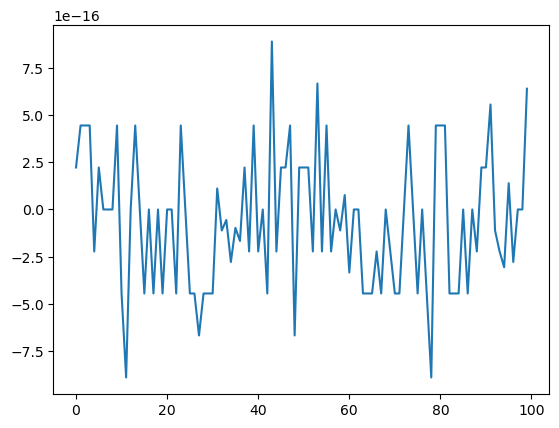

In [359]:
pred = my_circ_conv3(x,h)[4:]
plt.plot(pred - target)

In [344]:
min(abs(pred - target[]))

4.996003610813204e-16

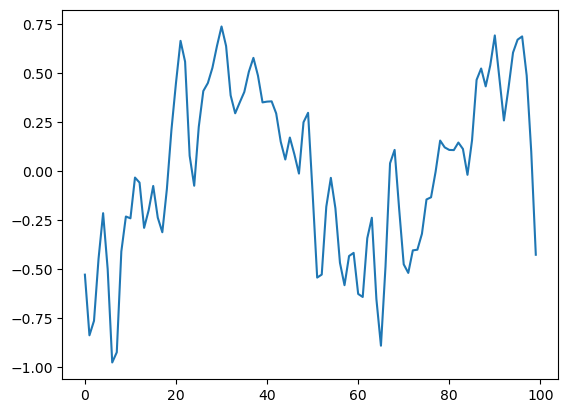

In [335]:
plt.plot(pred - target)

In [286]:
target

array([ 0.26761697,  0.68553183,  1.03331085,  1.13352349,  1.24951996,
        1.63449233,  2.22797931,  2.56104949,  2.63983742,  2.79433599,
        2.88236973,  2.82873209,  2.94256724,  3.11997231,  3.14391552,
        3.19731076,  3.38279747,  3.51098297,  3.47572404,  3.30244295,
        3.02652179,  2.63893727,  2.46946863,  2.56207606,  2.54555558,
        2.33799719,  2.13802442,  1.8897534 ,  1.61201765,  1.25222802,
        0.87506737,  0.61512358,  0.48984849,  0.32135073,  0.1405302 ,
       -0.08126582, -0.36545149, -0.65796929, -0.85126947, -1.00736875,
       -1.20460711, -1.36212434, -1.49753385, -1.51030689, -1.55537884,
       -1.68027759, -1.63911644, -1.66630355, -1.88707886, -1.96251403,
       -1.77229804, -1.41750296, -1.2425408 , -1.23427524, -1.20667475,
       -1.04333377, -0.73727605, -0.45940106, -0.30238421, -0.04051467,
        0.32614587,  0.60354132,  0.67008767,  0.8431383 ,  1.32465755,
        1.73593539,  1.81395498,  1.69734739,  1.70709772,  1.89

In [289]:
min(abs(my_circ_conv2(x,h) - target[0]))

4.996003610813204e-16

In [263]:
min(abs(my_circ_conv(x,h) - np.convolve(x, h)[-1]))

2.5673907444456745e-16

In [267]:
max(my_circ_conv(x,h) - np.convolve(x, h))

8.881784197001252e-16

In [265]:
np.convolve(x, h)

array([ 0.03033368,  0.15341702,  0.38970602,  0.70301768,  1.03331085,
        1.13352349,  1.24951996,  1.63449233,  2.22797931,  2.56104949,
        2.63983742,  2.79433599,  2.88236973,  2.82873209,  2.94256724,
        3.11997231,  3.14391552,  3.19731076,  3.38279747,  3.51098297,
        3.47572404,  3.30244295,  3.02652179,  2.63893727,  2.46946863,
        2.56207606,  2.54555558,  2.33799719,  2.13802442,  1.8897534 ,
        1.61201765,  1.25222802,  0.87506737,  0.61512358,  0.48984849,
        0.32135073,  0.1405302 , -0.08126582, -0.36545149, -0.65796929,
       -0.85126947, -1.00736875, -1.20460711, -1.36212434, -1.49753385,
       -1.51030689, -1.55537884, -1.68027759, -1.63911644, -1.66630355,
       -1.88707886, -1.96251403, -1.77229804, -1.41750296, -1.2425408 ,
       -1.23427524, -1.20667475, -1.04333377, -0.73727605, -0.45940106,
       -0.30238421, -0.04051467,  0.32614587,  0.60354132,  0.67008767,
        0.8431383 ,  1.32465755,  1.73593539,  1.81395498,  1.69

In [195]:
target

array([ 0.26761697,  0.68553183,  1.03331085,  1.13352349,  1.24951996,
        1.63449233,  2.22797931,  2.56104949,  2.63983742,  2.79433599,
        2.88236973,  2.82873209,  2.94256724,  3.11997231,  3.14391552,
        3.19731076,  3.38279747,  3.51098297,  3.47572404,  3.30244295,
        3.02652179,  2.63893727,  2.46946863,  2.56207606,  2.54555558,
        2.33799719,  2.13802442,  1.8897534 ,  1.61201765,  1.25222802,
        0.87506737,  0.61512358,  0.48984849,  0.32135073,  0.1405302 ,
       -0.08126582, -0.36545149, -0.65796929, -0.85126947, -1.00736875,
       -1.20460711, -1.36212434, -1.49753385, -1.51030689, -1.55537884,
       -1.68027759, -1.63911644, -1.66630355, -1.88707886, -1.96251403,
       -1.77229804, -1.41750296, -1.2425408 , -1.23427524, -1.20667475,
       -1.04333377, -0.73727605, -0.45940106, -0.30238421, -0.04051467,
        0.32614587,  0.60354132,  0.67008767,  0.8431383 ,  1.32465755,
        1.73593539,  1.81395498,  1.69734739,  1.70709772,  1.89

In [190]:
my_circ_conv(x,h) - target

array([-0.83649022, -0.89501758, -0.76569388, -0.44799167, -0.21620911,
       -0.50096884, -0.97845935, -0.92655716, -0.41185811, -0.23328649,
       -0.24253231, -0.0343961 , -0.06019751, -0.29124022, -0.20134828,
       -0.07733846, -0.23888195, -0.3136722 , -0.09292657,  0.20854001,
        0.44920225,  0.66350569,  0.55705316,  0.07686121, -0.07608695,
        0.22407887,  0.40753116,  0.44824379,  0.52600676,  0.63752538,
        0.73695028,  0.63710444,  0.38521888,  0.29377284,  0.34931829,
        0.40261656,  0.50598169,  0.57670347,  0.48581798,  0.34939946,
        0.35333764,  0.35475559,  0.29292674,  0.14818255,  0.05784499,
        0.1699707 ,  0.0837376 , -0.01397405,  0.24796243,  0.29621048,
       -0.11478083, -0.54501106, -0.52975723, -0.18322773, -0.03586605,
       -0.19094147, -0.4693987 , -0.58393271, -0.43489185, -0.41888639,
       -0.62853008, -0.64405599, -0.3439418 , -0.23959698, -0.65456988,
       -0.89279709, -0.48929743,  0.03858801,  0.10685726, -0.19

In [191]:
my_circ_conv(x,h)[2:] - target[:-2]

array([-5.55111512e-17,  1.11022302e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16,  4.44089210e-16,  0.00000000e+00, -4.44089210e-16,
        4.44089210e-16,  8.88178420e-16,  0.00000000e+00, -4.44089210e-16,
        0.00000000e+00,  4.44089210e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.33226763e-15,  0.00000000e+00, -4.44089210e-16,
       -4.44089210e-16, -4.44089210e-16,  4.44089210e-16,  0.00000000e+00,
        4.44089210e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.22044605e-16, -4.44089210e-16, -5.55111512e-16, -2.22044605e-16,
       -2.22044605e-16, -7.21644966e-16, -9.99200722e-16, -6.52256027e-16,
       -5.55111512e-17, -4.44089210e-16, -5.55111512e-16, -4.44089210e-16,
       -2.22044605e-16, -2.22044605e-16, -6.66133815e-16, -4.44089210e-16,
        2.22044605e-16, -6.66133815e-16, -2.22044605e-16, -8.88178420e-16,
        2.22044605e-16, -4.44089210e-16,  2.22044605e-16,  2.22044605e-16,
        8.88178420e-16,  

In [183]:
target

array([ 0.26761697,  0.68553183,  1.03331085,  1.13352349,  1.24951996,
        1.63449233,  2.22797931,  2.56104949,  2.63983742,  2.79433599,
        2.88236973,  2.82873209,  2.94256724,  3.11997231,  3.14391552,
        3.19731076,  3.38279747,  3.51098297,  3.47572404,  3.30244295,
        3.02652179,  2.63893727,  2.46946863,  2.56207606,  2.54555558,
        2.33799719,  2.13802442,  1.8897534 ,  1.61201765,  1.25222802,
        0.87506737,  0.61512358,  0.48984849,  0.32135073,  0.1405302 ,
       -0.08126582, -0.36545149, -0.65796929, -0.85126947, -1.00736875,
       -1.20460711, -1.36212434, -1.49753385, -1.51030689, -1.55537884,
       -1.68027759, -1.63911644, -1.66630355, -1.88707886, -1.96251403,
       -1.77229804, -1.41750296, -1.2425408 , -1.23427524, -1.20667475,
       -1.04333377, -0.73727605, -0.45940106, -0.30238421, -0.04051467,
        0.32614587,  0.60354132,  0.67008767,  0.8431383 ,  1.32465755,
        1.73593539,  1.81395498,  1.69734739,  1.70709772,  1.89

In [179]:
abs(my_circ_conv(x,h) - target[3])

array([1.70239674e+00, 1.34300925e+00, 8.65906527e-01, 4.47991666e-01,
       1.00212642e-01, 2.22044605e-16, 1.15996470e-01, 5.00968840e-01,
       1.09445582e+00, 1.42752600e+00, 1.50631393e+00, 1.66081249e+00,
       1.74884624e+00, 1.69520860e+00, 1.80904374e+00, 1.98644881e+00,
       2.01039202e+00, 2.06378727e+00, 2.24927398e+00, 2.37745947e+00,
       2.34220055e+00, 2.16891946e+00, 1.89299830e+00, 1.50541377e+00,
       1.33594514e+00, 1.42855256e+00, 1.41203209e+00, 1.20447370e+00,
       1.00450092e+00, 7.56229906e-01, 4.78494159e-01, 1.18704523e-01,
       2.58456123e-01, 5.18399916e-01, 6.43675006e-01, 8.12172759e-01,
       9.92993297e-01, 1.21478931e+00, 1.49897499e+00, 1.79149278e+00,
       1.98479297e+00, 2.14089224e+00, 2.33813060e+00, 2.49564783e+00,
       2.63105735e+00, 2.64383038e+00, 2.68890233e+00, 2.81380109e+00,
       2.77263993e+00, 2.79982704e+00, 3.02060236e+00, 3.09603752e+00,
       2.90582153e+00, 2.55102646e+00, 2.37606430e+00, 2.36779873e+00,
      

In [161]:
scipy.ndimage.convolve(x, h, mode='wrap')

array([ 0.26761697,  0.68553183,  1.03331085,  1.13352349,  1.24951996,
        1.63449233,  2.22797931,  2.56104949,  2.63983742,  2.79433599,
        2.88236973,  2.82873209,  2.94256724,  3.11997231,  3.14391552,
        3.19731076,  3.38279747,  3.51098297,  3.47572404,  3.30244295,
        3.02652179,  2.63893727,  2.46946863,  2.56207606,  2.54555558,
        2.33799719,  2.13802442,  1.8897534 ,  1.61201765,  1.25222802,
        0.87506737,  0.61512358,  0.48984849,  0.32135073,  0.1405302 ,
       -0.08126582, -0.36545149, -0.65796929, -0.85126947, -1.00736875,
       -1.20460711, -1.36212434, -1.49753385, -1.51030689, -1.55537884,
       -1.68027759, -1.63911644, -1.66630355, -1.88707886, -1.96251403,
       -1.77229804, -1.41750296, -1.2425408 , -1.23427524, -1.20667475,
       -1.04333377, -0.73727605, -0.45940106, -0.30238421, -0.04051467,
        0.32614587,  0.60354132,  0.67008767,  0.8431383 ,  1.32465755,
        1.73593539,  1.81395498,  1.69734739,  1.70709772,  1.89

In [108]:
# ISSUE IS PROBABLY THE PADDING??
# _nd_image.correlate(input, weights, output, mode, cval, origins)cale
_nd_image.

array([0.13533528, 0.60653066, 1.        , 0.60653066, 0.13533528])